# prueba tecnica 

URL:https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv
1. Realice un análisis exploratorio del conjunto de datos y presente sus
conclusiones.
2. Realice un preprocesamiento de los datos y explique el proceso realizado.
3. Seleccione un modelo para ajustar el precio de las viviendas teniendo en
cuenta métricas de validación y testeo, explique cuáles modelos presentó y el proceso de selección.
4. A partir del modelo seleccionado, y asumiendo que este es un estimador
acertado del valor de mercado, ¿Cómo seleccionaría usted viviendas
atractivas para inversión? De un ejemplo de una.

# 1. Análisis Exploratorio

In [1]:
import pandas as pd

#url = "https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv"
url = "home_data.csv"
df = pd.read_csv(url)
print(df.head())
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_liv

## caracteristicas de las viviendas y tipos de datos
- id: identificador único de la vivienda (entero)
- date: fecha de la venta (cadena/fecha)
- price: precio de la vivienda (float)
- bedrooms: número de habitaciones (entero)
- bathrooms: número de baños (entero/categórico)
- sqft_living: área habitable en pies cuadrados (entero)
- sqft_lot: área total del lote (entero)
- floors: número de pisos (entero/categórico)
- waterfront: si tiene vista al mar (1: sí, 0: no) (entero/categórico)
- view: calidad de la vista (entero/categórico)
- condition: condición de la vivienda (entero/categórico)
- grade: calificación de la construcción (entero/categórico)
- sqft_above: área sobre el suelo (entero)
- sqft_basement: área del sótano (entero)
- yr_built: año de construcción (entero)
- yr_renovated: año de renovación (entero)
- zipcode: código postal (cadena/categórico)
- lat: latitud (float)
- long: longitud (float)
- sqft_living15: área habitable de las 15 casas más cercanas (entero)
- sqft_lot15: área de lote de las 15 casas más cercanas (entero)


In [2]:
# Revisar valores nulos y duplicados en el DataFrame
print(df.isnull().sum())
print("numero de duplicados:",df.duplicated().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
numero de duplicados: 0


# Conclusiones
El análisis exploratorio realizado sobre el conjunto de datos de viviendas permitió obtener una visión integral de sus características y relaciones principales:

- **Estructura del Dataset:** El conjunto de datos contiene 21,613 registros y 25 variables, que incluyen información sobre precio, características físicas, ubicación y fechas relevantes de las viviendas.

- **Calidad de los Datos:** No se detectaron valores nulos ni duplicados, lo que indica que el dataset es adecuado para el análisis y modelado.

- **Variables Categóricas y Numéricas:** Se identificaron y separaron las variables categóricas (como vista al mar, calidad de la vista, condición, calificación, código postal, año y mes de venta) y numéricas (como precio, habitaciones, baños, áreas, año de construcción, latitud, longitud, etc.), facilitando el análisis y el preprocesamiento posterior.

# 2 Preprocesamiento de los datos  

In [3]:
# Extraer año y mes de la columna 'date'
df['year_sold'] = df['date'].str[:4].astype(int)
df['month_sold'] = df['date'].str[4:6].astype(int)

# Calcular años desde la renovación (si no fue renovada, usar año de construcción)
df['last_renovation'] = df[['yr_built', 'yr_renovated']].max(axis=1)
df['years_since_renovation'] = df['year_sold'] - df['last_renovation']

print(df[['date', 'year_sold', 'month_sold', 'yr_built', 'yr_renovated', 'years_since_renovation']].head())

              date  year_sold  month_sold  yr_built  yr_renovated  \
0  20141013T000000       2014          10      1955             0   
1  20141209T000000       2014          12      1951          1991   
2  20150225T000000       2015           2      1933             0   
3  20141209T000000       2014          12      1965             0   
4  20150218T000000       2015           2      1987             0   

   years_since_renovation  
0                      59  
1                      23  
2                      82  
3                      49  
4                      28  


In [4]:
# Separar columnas categóricas y no categóricas según el significado de los datos
categoricas = [
    'floors','waterfront', 'view', 'condition', 'grade', 'zipcode','year_sold','month_sold'
 ]
no_categoricas = [
     'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
    'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15' ,'years_since_renovation'
 ]

# DataFrame de variables categóricas
df_categoricas = df[categoricas]
print('Variables categóricas:')
for col in df_categoricas.columns:
    print(f'\n{col} value counts:')
    print(df_categoricas[col].value_counts())

# DataFrame de variables no categóricas
df_no_categoricas = df[no_categoricas]
print('\nVariables no categóricas:')
print(df_no_categoricas.describe())

Variables categóricas:

floors value counts:
floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

waterfront value counts:
waterfront
0    21450
1      163
Name: count, dtype: int64

view value counts:
view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

condition value counts:
condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

grade value counts:
grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

zipcode value counts:
zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

year_sold value counts:
year_sold
2014    14633
2015     6980
Name: count, dtype: int64

month_sold value counts:
month_sold
5     2414
4  

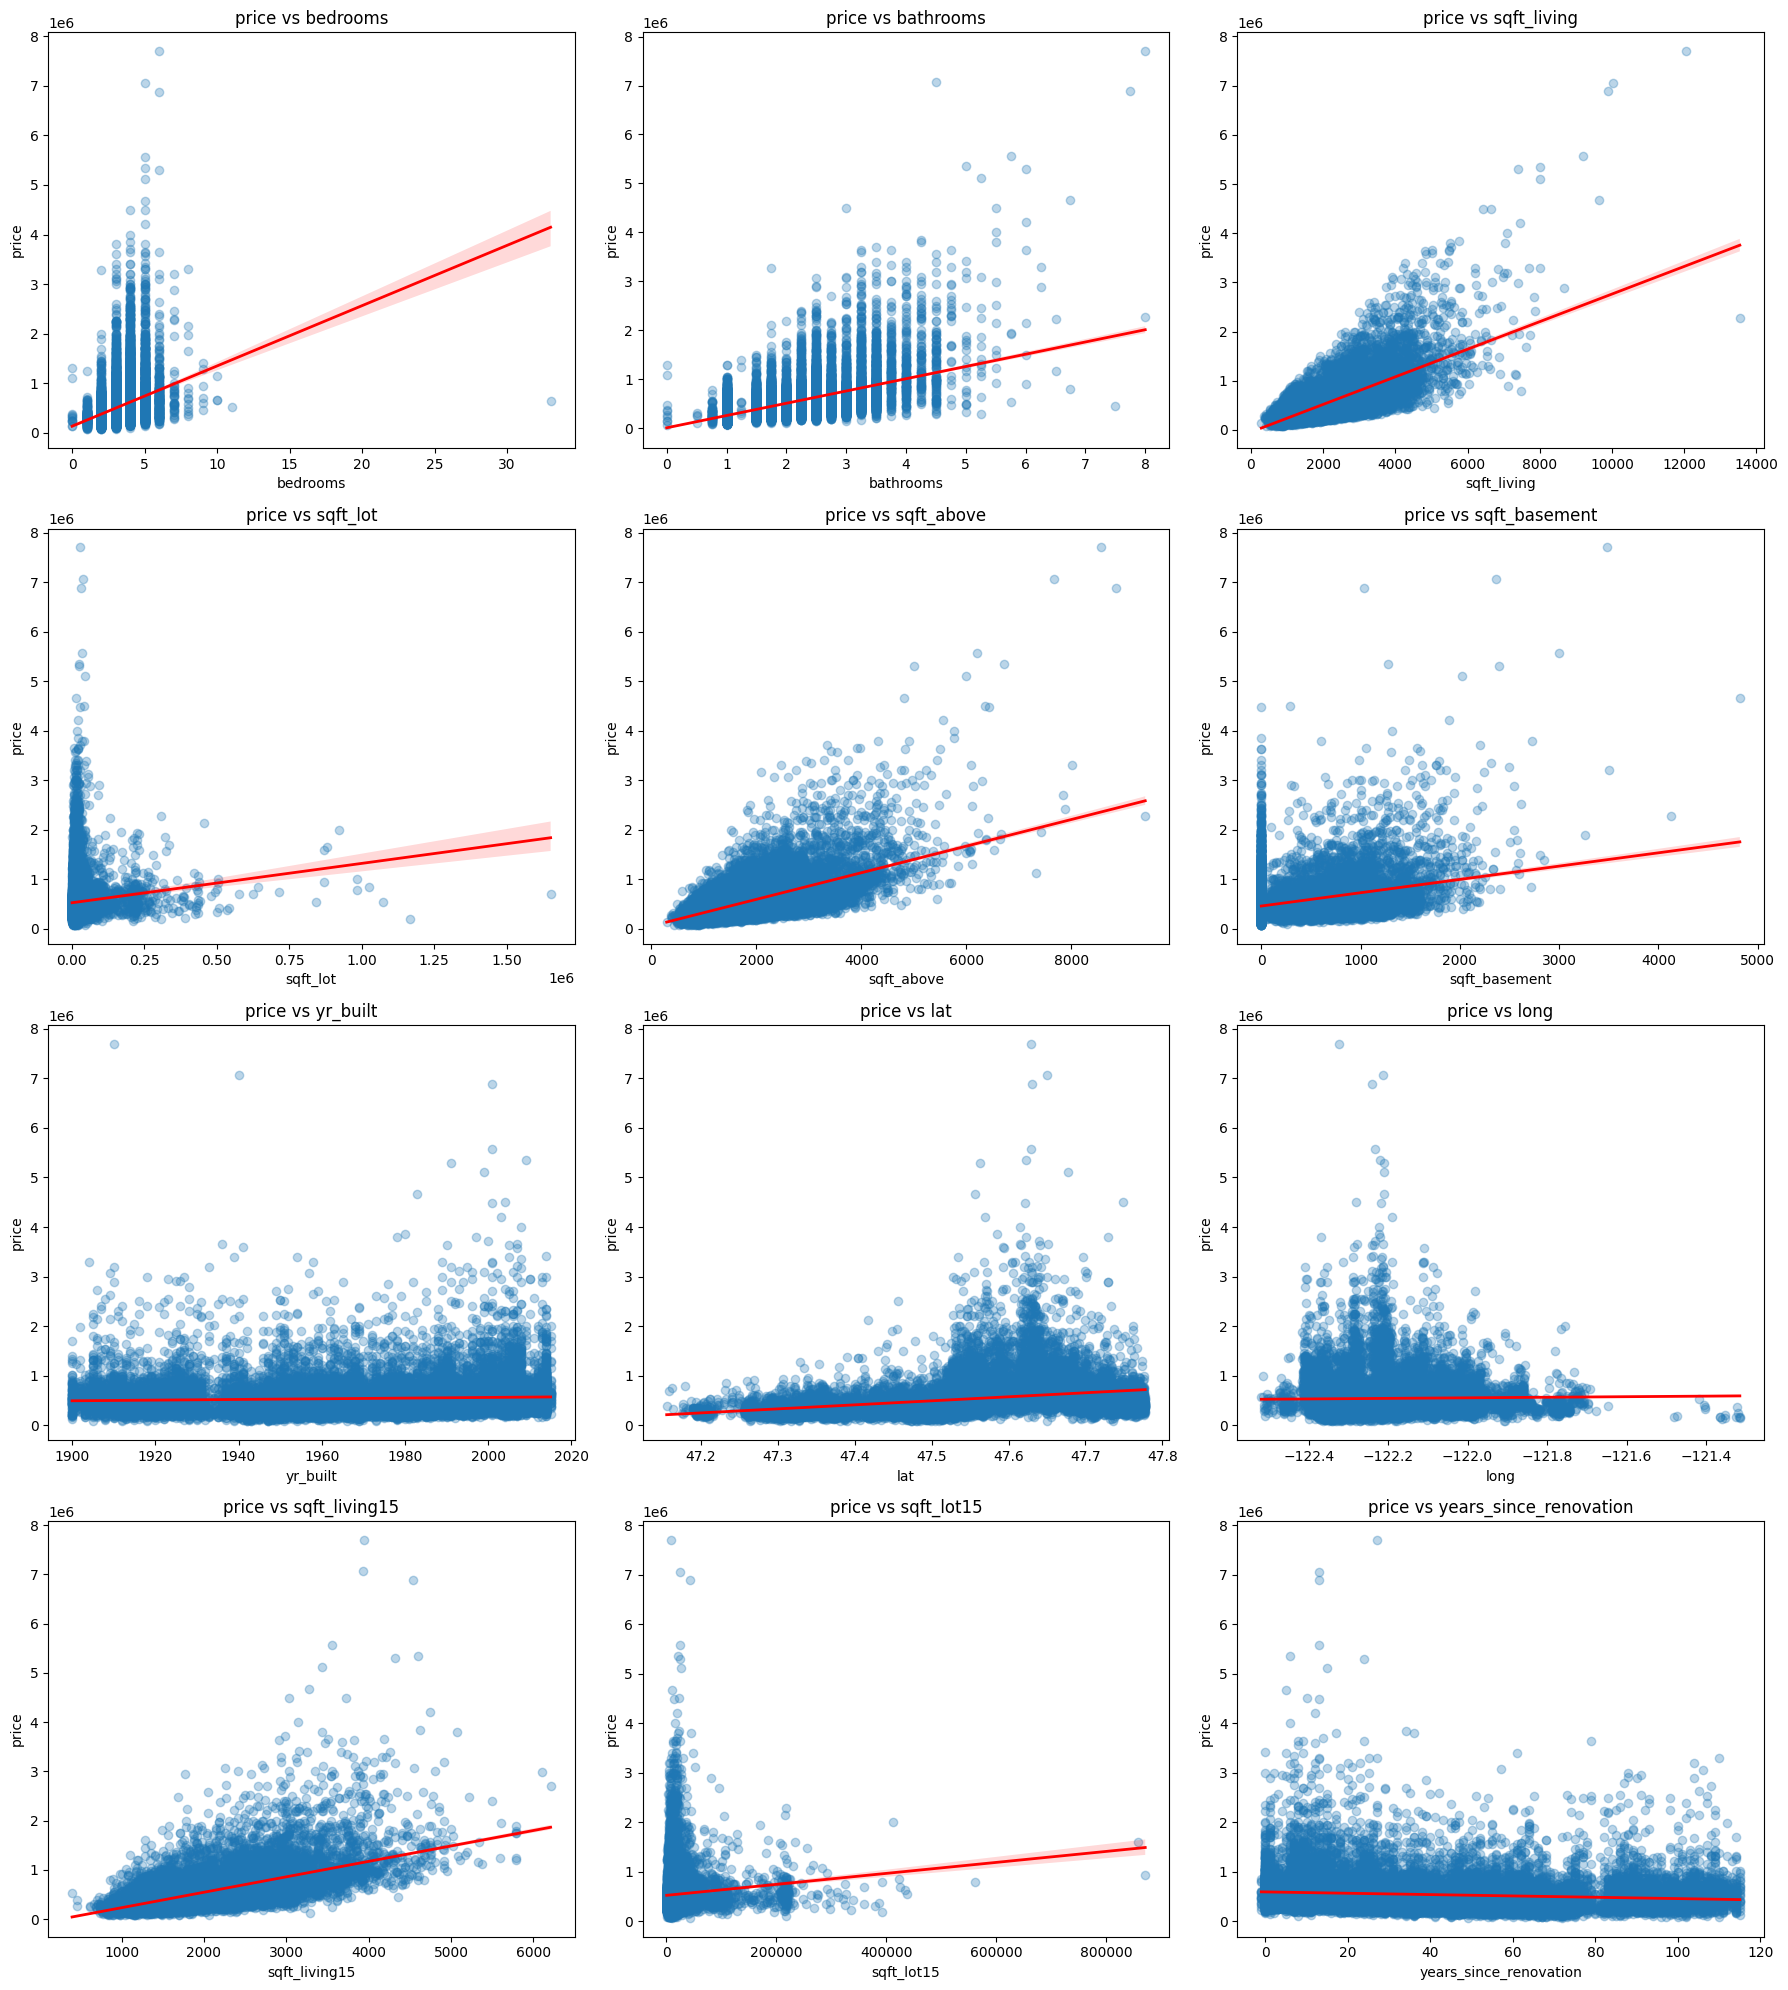

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Graficar precio vs cada variable no categórica con regresión lineal
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate([c for c in no_categoricas if c != 'price']):
    ax = axes[i]
    x = df[col].values.reshape(-1, 1)
    y = df['price'].values
    # Scatter plot y ajuste de regresión lineal con seaborn
    sns.regplot(x=df[col], y=df['price'], scatter_kws={'alpha':0.3}, line_kws={'color':'red', 'linewidth':2}, ax=ax)
    ax.set_title(f'price vs {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('price')

# Eliminar ejes vacíos si hay menos de 12 variables
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [6]:
# Calcular estadísticas por zipcode
zip_stats = df.groupby('zipcode').agg(
	cantidad_casas=('price', 'count'),
	precio_promedio=('price', 'mean'),
	std_precio=('price', 'std')
).reset_index()

# Calcular la desviación relativa (std / media)
zip_stats['desviacion_relativa'] = zip_stats['std_precio'] / zip_stats['precio_promedio']

# Filtrar los 30 zipcodes con más casas
top_zipcodes_30 = zip_stats.sort_values(by='cantidad_casas', ascending=False).head(30)['zipcode']

# Seleccionar solo esos zipcodes y ordenar por desviación relativa
zip_stats_top_30 = zip_stats[zip_stats['zipcode'].isin(top_zipcodes_30)].sort_values(by='desviacion_relativa', ascending=False).reset_index(drop=True).round(2)

print(zip_stats_top_30)


    zipcode  cantidad_casas  precio_promedio  std_precio  desviacion_relativa
0     98144             343        594547.64   400590.39                 0.67
1     98155             446        423725.70   268209.32                 0.63
2     98034             545        521652.86   309625.61                 0.59
3     98033             432        803719.53   462520.97                 0.58
4     98004             317       1355927.10   745820.09                 0.55
5     98056             406        420890.55   229825.53                 0.55
6     98118             508        417637.43   226036.88                 0.54
7     98006             498        859684.76   445911.56                 0.52
8     98199             317        791820.83   397868.26                 0.50
9     98059             468        493552.52   232829.48                 0.47
10    98027             412        616990.59   290842.46                 0.47
11    98125             410        469455.77   205437.82        

### Conclusión sobre el uso de la desviación estándar para identificar oportunidades de inversión

La desviación estándar es una herramienta clave para analizar la dispersión de los precios de las viviendas en cada zona (zipcode). Un valor elevado de esta métrica revela una alta variabilidad en los precios, lo que indica la coexistencia de propiedades de distintos rangos de valor dentro de la misma área. En estos zipcodes, es más probable encontrar viviendas cuyo precio de venta esté significativamente por debajo del promedio local, lo que representa oportunidades atractivas para inversión y potencial de revalorización. Por el contrario, zonas con baja desviación estándar muestran precios más uniformes, dificultando la identificación de propiedades subvaloradas o "gangas". Por ello, enfocar la búsqueda en zonas con mayor dispersión de precios permite al inversionista identificar mercados dinámicos y maximizar el retorno esperado, aprovechando la heterogeneidad de valores presentes en el área.

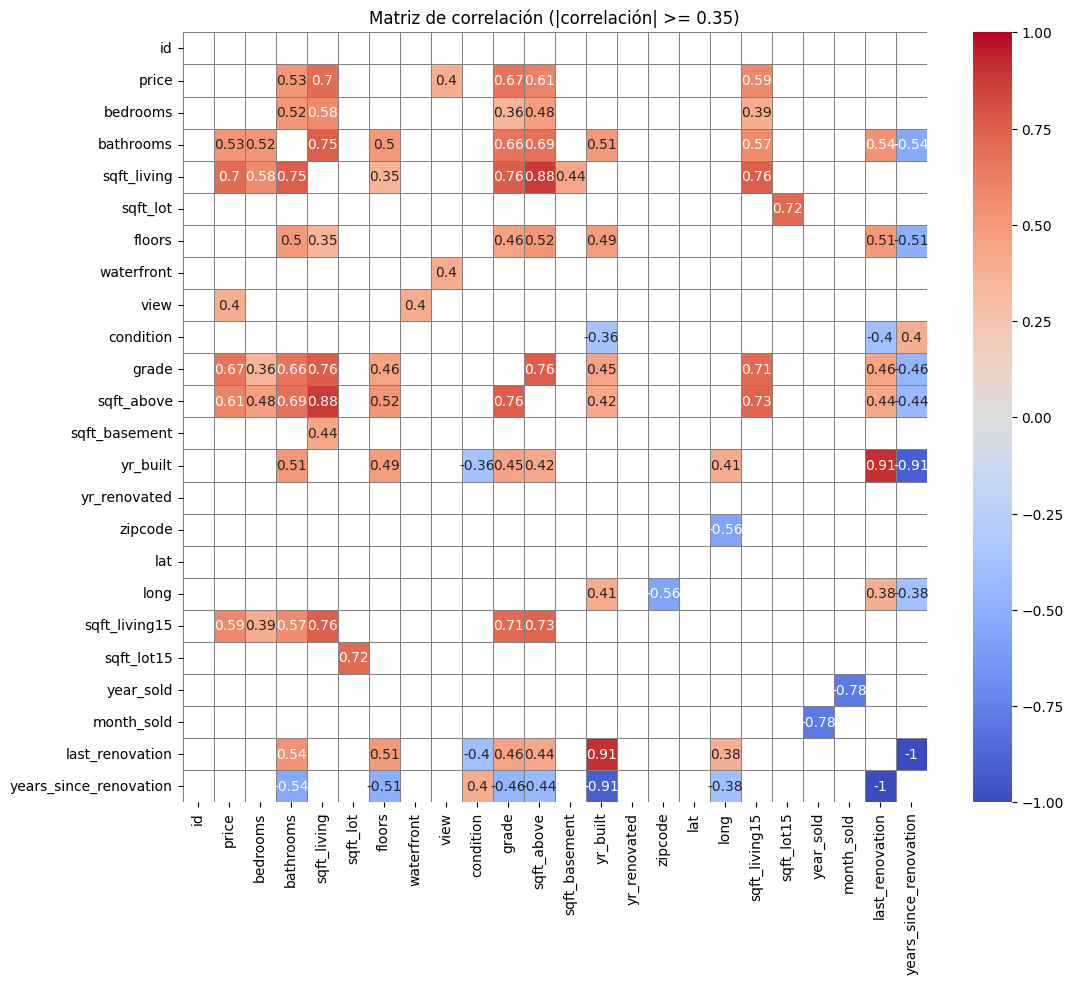

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df.corr(numeric_only=True)

treshold = 0.35
mask = (corr_matrix.abs() >= treshold) & (corr_matrix.abs() < 1.0)

# Crear una nueva matriz con solo los valores filtrados, el resto como NaN
filtered_corr = corr_matrix.where(mask)
# Graficar el mapa de calor con seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='gray')
plt.title(f'Matriz de correlación (|correlación| >= {treshold})')
plt.show()


In [8]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# PCA (Análisis de Componentes Principales) se utiliza para reducir la dimensionalidad del conjunto de variables más correlacionadas con el precio.
# Esto permite resumir la información de varias variables en una sola componente principal (PC1), que captura la mayor varianza posible.
# Usar PCA ayuda a simplificar el modelo, evitar multicolinealidad y visualizar mejor la relación entre las variables y el precio.
# Además, facilita la interpretación y el uso de modelos lineales o polinómicos sobre una sola variable compuesta.

# 1. Lista de variables con mayor correlación con el precio (umbral ya definido)
variables_correlacionadas = corr_matrix['price'].abs().sort_values(ascending=False)
variables_mas_correlacionadas = variables_correlacionadas[variables_correlacionadas >= treshold].index.tolist()
variables_mas_correlacionadas.remove('price')  # quitamos 'price' de la lista

print("Variables más correlacionadas con el precio:\n"
      "", variables_mas_correlacionadas)

# 2. Definir X y Y
X = df[variables_mas_correlacionadas]
X_all = df.drop(columns=['price','date'])
Y = df['price']
ids = df['id'].values




Variables más correlacionadas con el precio:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view']


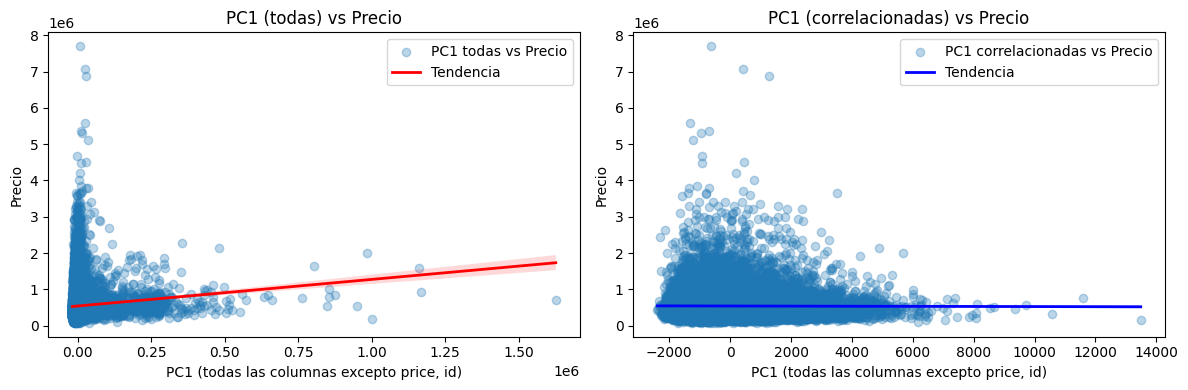

In [9]:
# Graficar PCA de todas las columnas (excepto 'price') vs precio y vs PC1 en dos subplots lado a lado
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Aplicar PCA para obtener la primera componente principal (PC1)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Mezclar aleatoriamente los datos para evitar sesgos
X_pca, Y, ids = shuffle(X_pca, Y, ids, random_state=42)

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test, ids_train, ids_test = train_test_split(
    X_pca, Y, ids, test_size=0.2, random_state=42
)

# PCA sobre todas las columnas excepto 'price', 'date' e 'id'
X_all = df.drop(columns=['price', 'date', 'id'])
pca_all = PCA(n_components=1)
PC1_all = pca_all.fit_transform(X_all)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfica 1: PC1 de todas las columnas vs precio
sns.regplot(x=PC1_all.flatten(), y=df['price'], scatter_kws={'alpha':0.3, 'label':'PC1 todas vs Precio'}, line_kws={'color':'red', 'linewidth':2, 'label':'Tendencia'}, ax=axes[0])
axes[0].set_xlabel('PC1 (todas las columnas excepto price, id)')
axes[0].set_ylabel('Precio')
axes[0].set_title('PC1 (todas) vs Precio')
axes[0].legend(['PC1 todas vs Precio', 'Tendencia'])

# Gráfica 2: PC1 de todas las columnas vs PC1 de las variables más correlacionadas
sns.regplot(x=X_pca.flatten(), y=df['price'], scatter_kws={'alpha':0.3, 'label':'PC1 correlacionadas vs Precio'}, line_kws={'color':'blue', 'linewidth':2, 'label':'Tendencia'}, ax=axes[1])
axes[1].set_xlabel('PC1 (todas las columnas excepto price, id)')
axes[1].set_ylabel('Precio')
axes[1].set_title('PC1 (correlacionadas) vs Precio')
axes[1].legend(['PC1 correlacionadas vs Precio', 'Tendencia'])

plt.tight_layout()
plt.show()


## Conclusiones del Preprocesamiento de los Datos

El preprocesamiento realizado sobre el conjunto de datos de viviendas permitió transformar y preparar la información para el modelado predictivo de precios:

- **Extracción y Transformación de Variables:** Se generaron nuevas variables temporales (`year_sold`, `month_sold`, `years_since_renovation`) que enriquecen el análisis y permiten capturar efectos temporales y de renovación en el precio de las viviendas.

- **Identificación de Variables Relevantes:** Mediante el análisis de correlación, se seleccionaron las variables con mayor relación con el precio (`sqft_living`, `grade`, `sqft_above`, `sqft_living15`, `bathrooms`, `view`), optimizando el conjunto de características para el modelo.


- **Preparación de Datos para Modelado:** Se realizó la separación en conjuntos de entrenamiento y prueba, asegurando la aleatorización y la correcta distribución de los datos para validar el desempeño de los modelos.

En resumen, el preprocesamiento permitió limpiar, transformar y seleccionar las variables más relevantes, dejando el dataset listo para la etapa de modelado y evaluación de algoritmos predictivos.

### Argumento sobre la relación de las variables seleccionadas con el precio

Las variables seleccionadas (`sqft_living`, `grade`, `sqft_above`, `sqft_living15`, `bathrooms`, `view`) presentan la mayor correlación con el precio de las viviendas, lo que indica que son las características más valoradas por el mercado y que más influyen en la determinación del valor de una propiedad.

- **Área habitable (`sqft_living`, `sqft_above`, `sqft_living15`)**: El tamaño de la vivienda y el espacio disponible son factores clave para los compradores, ya que una mayor superficie suele asociarse a mayor comodidad y funcionalidad.
- **Calidad de la construcción (`grade`)**: El mercado premia las viviendas con mejores acabados y materiales, reflejado en una mayor calificación de construcción.
- **Número de baños (`bathrooms`)**: Más baños aportan comodidad, especialmente en viviendas familiares, y suelen incrementar el valor.
- **Vista (`view`)**: Las propiedades con mejores vistas suelen ser más atractivas y demandadas, lo que se traduce en precios más altos.

En resumen, estas variables reflejan preferencias del mercado y características que aportan valor diferencial a las viviendas, explicando su fuerte relación con el precio.

# 3. Seleccione un modelo


la variable objetivo sería potencial    


Linear Regression metrics:
MAE: 177486.16
MAE normalizado: 0.33
MSE: 74988461718.09
MSE normalizado: 0.2577
RMSE: 273840.21
R2: 0.4704
MAPE: 36.42%

Polynomial Regression (degree 2) metrics:
MAE: 171988.86
MAE normalizado: 0.32
MSE: 66559289190.72
MSE normalizado: 0.2287
RMSE: 257990.87
R2: 0.5299
MAPE: 35.75%
Ecuación regresión lineal: y = 539600.60 + 189.73·x
Ecuación regresión polinómica: y = 502662.06 + 152.24·x + 0.02·x²


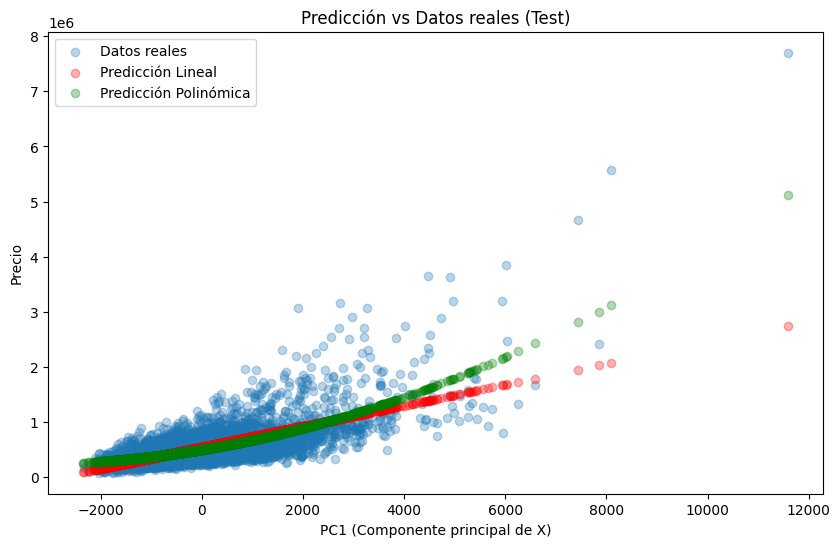

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Entrenamiento regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred_linear = linear_model.predict(X_test)

# Entrenamiento regresión polinómica (grado 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
Y_pred_poly = poly_model.predict(X_test_poly)

# Métricas
def print_metrics(y_true, y_pred, nombre):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    mape = (abs((y_true - y_pred) / y_true)).mean() * 100
    mae_norm = mae / Y_test.mean()
    mse_norm = mse / (Y_test.mean() ** 2)

    print(f"\n{nombre} metrics:")
    mae_norm = mae / Y_test.mean()
    print(f"MAE: {mae:.2f}")
    print(f"MAE normalizado: {mae_norm:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"MSE normalizado: {mse_norm:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")

print_metrics(Y_test, Y_pred_linear, "Linear Regression")
print_metrics(Y_test, Y_pred_poly, "Polynomial Regression (degree 2)")

# Ecuación regresión lineal
eq_linear = f"y = {linear_model.intercept_:.2f} + {linear_model.coef_[0]:.2f}·x"
print("Ecuación regresión lineal:", eq_linear)

# Ecuación regresión polinómica (grado 2)
coef_poly = poly_model.coef_
intercept_poly = poly_model.intercept_
eq_poly = f"y = {intercept_poly:.2f} + {coef_poly[1]:.2f}·x + {coef_poly[2]:.2f}·x²"
print("Ecuación regresión polinómica:", eq_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, alpha=0.3, label='Datos reales')
plt.scatter(X_test, Y_pred_linear, color='red', alpha=0.3, label='Predicción Lineal')
plt.scatter(X_test, Y_pred_poly, color='green', alpha=0.3, label='Predicción Polinómica')
plt.xlabel('PC1 (Componente principal de X)')
plt.ylabel('Precio')
plt.title('Predicción vs Datos reales (Test)')
plt.legend()
plt.show()



Random Forest Regressor metrics:
MAE: 202897.25
MAE normalizado: 0.38
MSE: 96167221478.84
MSE normalizado: 0.3304
RMSE: 310108.40
R2: 0.3208
MAPE: 40.44%


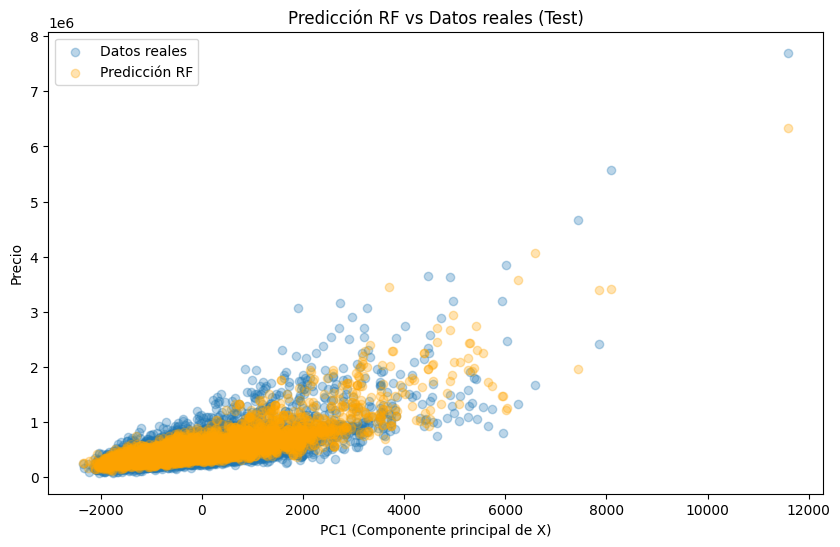

In [11]:
# Entrenamiento y evaluación con Random Forest
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

# Métricas para el modelo Random Forest
print_metrics(Y_test, Y_pred_rf, "Random Forest Regressor")

# Gráfico de comparación
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, alpha=0.3, label='Datos reales')
plt.scatter(X_test, Y_pred_rf, color='orange', alpha=0.3, label='Predicción RF')
plt.xlabel('PC1 (Componente principal de X)')
plt.ylabel('Precio')
plt.title('Predicción RF vs Datos reales (Test)')
plt.legend()
plt.show()


esión
| Métrica         | Random Forest      | Linear Regression | Polynomial Regression (degree 2) |
|-----------------|-------------------|------------------|----------------------------------|
| **MAE**         | 202,897           | 177,486          | 171,989                          |
| **MAE normalizado** | 0.38          | 0.33             | 0.32                             |
| **MSE**         | 96,167,221,478    | 74,988,461,718   | 66,559,289,191                   |
| **MSE normalizado** | 0.3304        | 0.2577           | 0.2287                           |
| **RMSE**        | 310,108           | 273,840          | 257,991                          |
| **R2**          | 0.3208            | 0.4704           | 0.5299                           |
| **MAPE (%)**    | 40.44             | 36.42            | 35.75                            |

**Polynomial Regression (degree 2) metrics:**
- MAE: 171,988.86
- MAE normalizado: 0.32
- MSE: 66,559,289,190.72
- MSE normalizado: 0.2287
- RMSE: 257,990.87
- R2: 0.5299
- MAPE: 35.75%

**Ecuación regresión lineal:**  
y = 539600.60 + 189.73·x

**Ecuación regresión polinómica:**  
y = 502662.06 + 152.24·x + 0.02·x²
### Interpretación de métricas
- **MAE (Error Absoluto Medio):** Promedio de las diferencias absolutas entre los valores reales y predichos. Menor es mejor.
- **MSE (Error Cuadrático Medio):** Promedio de los errores al cuadrado. Penaliza más los errores grandes.
- **RMSE (Raíz del Error Cuadrático Medio):** Raíz cuadrada del MSE, en las mismas unidades que la variable objetivo.
- **R2 (Coeficiente de Determinación):** Proporción de la varianza explicada por el modelo. Más cercano a 1 es mejor.
- **MAPE (Error Porcentual Absoluto Medio):** Promedio del error absoluto en porcentaje. Útil para comparar modelos en diferentes escalas.


### Selección y justificación
El modelo **Polynomial Regression (grado 2)** presenta los mejores resultados en todas las métricas: menor MAE, MSE, RMSE y MAPE, y mayor R2. Esto indica que logra el mejor ajuste y predicción para este conjunto de datos.

La regresión polinómica permite capturar relaciones no lineales entre las variables, lo que mejora la capacidad predictiva frente a la regresión lineal y Random Forest en este caso.

**Por qué no Random Forest:** Aunque suele ser robusto, aquí no supera a los modelos polinómicos. Puede requerir ajuste de hiperparámetros o más variables.


---
**Conclusión:**
El modelo polinómico es el más adecuado para estimar el precio de las viviendas en este contexto, por su mejor desempeño en las métricas y su capacidad para capturar relaciones no lineales.


In [12]:
import joblib

# Guardar el modelo polinómico y el preprocesador PolynomialFeatures
joblib.dump(poly_model, 'modelo_polinomico.pkl')
joblib.dump(poly, 'preprocesador_poly.pkl')

print("Modelo polinómico y preprocesador guardados como 'modelo_polinomico.pkl' y 'preprocesador_poly.pkl'")

Modelo polinómico y preprocesador guardados como 'modelo_polinomico.pkl' y 'preprocesador_poly.pkl'


# 4 viviendas atractivas para inversión

## Procedimiento para Seleccionar Viviendas Atractivas para Inversión

Para identificar viviendas atractivas para inversión, se sigue un enfoque basado en el análisis estadístico y el modelo predictivo ajustado previamente. El procedimiento consiste en:

1. **Selección de Zonas con Alta Dispersión de Precios:**  
    Se priorizan los códigos postales (`zipcode`) con mayor desviación estándar relativa, ya que en estas zonas existe mayor variabilidad de precios y, por lo tanto, más oportunidades de encontrar propiedades subvaloradas respecto al promedio local.

2. **Estimación del Precio de Mercado:**  
    Se utiliza el modelo polinómico ajustado para estimar el precio de mercado de cada vivienda en función de las variables más correlacionadas con el precio. La ecuación general del modelo polinómico es:

    ```
    y = β₀ + β₁·x + β₂·x²
    ```
    Donde:
    - `y` es el precio estimado,
    - `x` es el valor de la componente principal (PC1) calculada a partir de las variables relevantes.



3. **Identificación de Viviendas Subvaloradas:**  
    Se compara el precio real de cada vivienda con el precio estimado por el modelo. Las viviendas cuyo precio real está significativamente por debajo del estimado se consideran potencialmente atractivas para inversión.

    **Criterio de selección:**
    ```
    Potencial = Precio estimado - Precio real
    ```
    Se seleccionan aquellas viviendas con mayor valor de "Potencial", es decir, aquellas que presentan la mayor diferencia negativa entre el precio de mercado estimado y el precio de venta actual.

4. **Ejemplo de Selección:**  
    Se filtra el conjunto de datos para mostrar una vivienda en una zona de alta dispersión de precios, cuyo valor de "Potencial" sea alto y que cumpla con otras condiciones relevantes (estado, vista, tamaño, etc.).

---

**Conclusión:**  
Este procedimiento permite identificar oportunidades de inversión de manera objetiva, combinando el análisis estadístico zonal y la estimación precisa del valor de mercado mediante el modelo predictivo.

In [13]:

# Crear DataFrame de resultados del test
# Suponiendo que X_test proviene de PCA, y que el índice de X_test corresponde al índice original del DataFrame df
# Si X_test es un array, usamos el índice de Y_test para recuperar los datos originales

# Recuperar los índices originales del test
test_indices = Y_test.index if hasattr(Y_test, 'index') else None

# Obtener los valores estimados por el modelo polinómico
precio_estimado = Y_pred_poly

# Obtener los valores reales
precio_real = Y_test.values

# Si tienes el id en el DataFrame original, recupéralo usando los índices del test
if test_indices is not None:
	ids = df.loc[test_indices, 'id'].values
else:
	ids = None

# Calcular el potencial y el potencial normalizado
potencial = precio_estimado - precio_real
potencial_normalizado = potencial / precio_estimado

# Crear el DataFrame de resultados
test_results_sorted_norm = pd.DataFrame({
	'id': ids,
	'precio_real': precio_real,
	'precio_estimado': precio_estimado,
	'potencial': potencial,
	'potencial_normalizado': potencial_normalizado
})

# Ordenar por potencial_normalizado descendente
test_results_sorted_norm = test_results_sorted_norm.sort_values(by='potencial_normalizado', ascending=False)

# Filtrar solo las casas con potencial positivo mayor al umbral
umbral = 0.10  # puedes ajustar el umbral aquí
casas_potenciales = test_results_sorted_norm[test_results_sorted_norm['potencial_normalizado'] > umbral].round(2)

# Mostrar las casas potenciales ordenadas por potencial_normalizado
cols = ['id', 'precio_real', 'precio_estimado', 'potencial', 'potencial_normalizado']
print(casas_potenciales[cols].to_string())

# Imprimir el número de casas potenciales
print(f"\nTotal de casas potenciales: {casas_potenciales.shape[0]}")


              id  precio_real  precio_estimado   potencial  potencial_normalizado
1224  3883800011        82000        301550.59   219550.59                   0.73
3027  6929602721        95000        340164.95   245164.95                   0.72
265   3028200080        81000        280757.15   199757.15                   0.71
3610  4239400300        90000        308019.69   218019.69                   0.71
1056  1788900230        86500        289711.69   203211.69                   0.70
2571  1049010620        90000        300517.44   210517.44                   0.70
1602  2724200705        95000        307870.75   212870.75                   0.69
318   6181430280       330000       1049186.36   719186.36                   0.69
3611  5637200450       257000        815417.91   558417.91                   0.68
805   7224000980       100000        315081.96   215081.96                   0.68
1797   795000765        92000        288812.65   196812.65                   0.68
536   2023049218

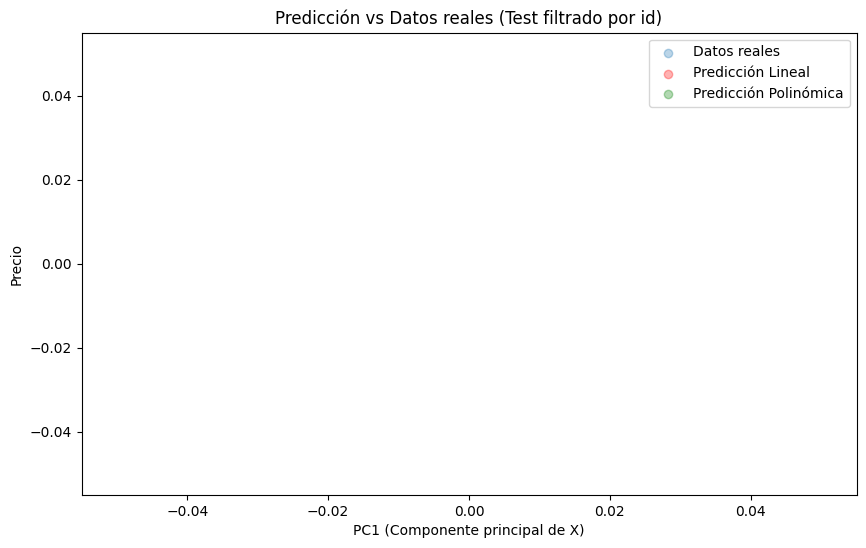

In [23]:
# Graficar predicción vs datos reales SOLO para los ids de test_results_sorted_norm
ids_test = test_results_sorted_norm['id']
# Recuperar los índices de los datos de test en X_test y Y_test
if hasattr(Y_test, 'index') and hasattr(X_test, 'shape') and X_test.shape[0] == len(Y_test):
    # Filtrar por los índices originales de test
    mask = Y_test.index.isin(ids_test)
    X_test_filtrado = X_test[mask]
    Y_test_filtrado = Y_test[mask]
    Y_pred_linear_filtrado = Y_pred_linear[mask]
    Y_pred_poly_filtrado = Y_pred_poly[mask]
else:
    # Si no hay índice, filtrar por id en test_results_sorted_norm
    X_test_filtrado = X_test
    Y_test_filtrado = Y_test
    Y_pred_linear_filtrado = Y_pred_linear
    Y_pred_poly_filtrado = Y_pred_poly
plt.figure(figsize=(10, 6))
plt.scatter(X_test_filtrado, Y_test_filtrado, alpha=0.3, label='Datos reales')
plt.scatter(X_test_filtrado, Y_pred_linear_filtrado, color='red', alpha=0.3, label='Predicción Lineal')
plt.scatter(X_test_filtrado, Y_pred_poly_filtrado, color='green', alpha=0.3, label='Predicción Polinómica')
plt.xlabel('PC1 (Componente principal de X)')
plt.ylabel('Precio')
plt.title('Predicción vs Datos reales (Test filtrado por id)')
plt.legend()
plt.show()

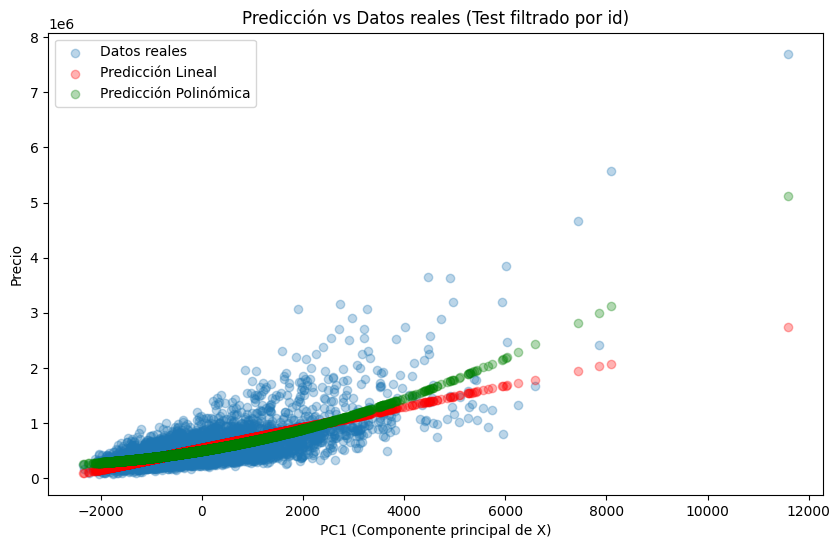

In [15]:
# Ahora ids_test corresponde a X_test y Y_test
# Filtra por los ids de test_results_sorted_norm
mask = np.isin(ids_test, test_results_sorted_norm['id'])
X_test_filtrado = X_test[mask]
Y_test_filtrado = Y_test[mask]
Y_pred_linear_filtrado = Y_pred_linear[mask]
Y_pred_poly_filtrado = Y_pred_poly[mask]

plt.figure(figsize=(10, 6))
plt.scatter(X_test_filtrado, Y_test_filtrado, alpha=0.3, label='Datos reales')
plt.scatter(X_test_filtrado, Y_pred_linear_filtrado, color='red', alpha=0.3, label='Predicción Lineal')
plt.scatter(X_test_filtrado, Y_pred_poly_filtrado, color='green', alpha=0.3, label='Predicción Polinómica')
plt.xlabel('PC1 (Componente principal de X)')
plt.ylabel('Precio')
plt.title('Predicción vs Datos reales (Test filtrado por id)')
plt.legend()
plt.show()